In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("tested.csv")

# Quick look at data
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [ ]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can fill with mean/median/mode)
df = df.dropna()

print("Shape after removing nulls:", df.shape)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Shape after removing nulls: (87, 12)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())


    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
12          904         1       1    72    0  23.0      1      0      32   
14          906         1       1    15    0  47.0      1      0      65   
24          916         1       1    66    0  48.0      1      3      53   
26          918         1       1    60    0  22.0      0      1       9   
28          920         0       1     9    1  41.0      0      0       7   

        Fare  Cabin  Embarked  
12   82.2667     12         2  
14   61.1750     58         2  
24  262.3750     15         0  
26   61.9792     10         0  
28   30.5000      2         2  


In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (87, 11)
Target shape: (87,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Decision Tree results
print("📌 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest results
print("📌 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📌 Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

📌 Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



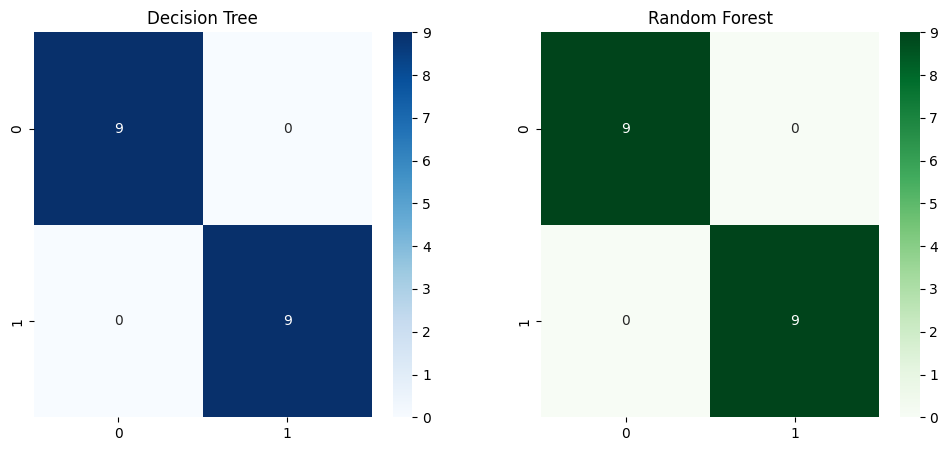

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest")

plt.show()
